In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/tusharbhatt/Desktop/Python for Finance/BTC-USDT.csv')
df

,date,open,high,low,close,volume
0,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009
1,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916
2,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691
3,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249
4,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
51404,1688364000000,30673.61,30678.41,30606.00,30651.25,1036.522350
51405,1688367600000,30651.25,30759.80,30636.65,30667.19,1758.796390
51406,1688371200000,30667.19,30700.92,30599.07,30640.12,1390.909010
51407,1688374800000,30640.11,30670.00,30602.29,30610.61,833.620010


In [4]:
crypto_list = ["ADA", "BCH", "BNB", "BTC", "ETC", "ETH", "LINK", "LTC", "XLM", "XRP"]
df_list = {}

for crypto in crypto_list:
    df_list[crypto] = pd.read_csv(f'/Users/tusharbhatt/Desktop/Python for Finance/{crypto}-USDT.csv')
    df_list[crypto]["date"] = pd.to_datetime(df_list[crypto]["date"], unit="ms")
    df_list[crypto] = df_list[crypto].set_index("date")

    duplicate_mask = df_list[crypto].index.duplicated(keep='last')
    df_list[crypto].loc[duplicate_mask]
    df_list[crypto] = df_list[crypto][~duplicate_mask]


In [5]:
df_list['BTC'].describe()


,open,high,low,close,volume
count,51383.000000,51383.000000,51383.000000,51383.000000,51383.000000
mean,19953.441256,20062.614602,19837.535492,19953.945733,3200.337733
std,16125.883658,16215.651611,16030.902587,16125.807732,4472.817863
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000
25%,7555.510000,7597.320000,7520.000000,7556.670000,1015.423808
50%,11535.770000,11600.000000,11469.270000,11539.700000,1770.308040
75%,29500.860000,29629.275000,29357.255000,29502.095000,3479.318780
max,68635.120000,69000.000000,68451.190000,68633.690000,137207.188600


In [6]:
df_list['ETH'].index.nunique(), len(df_list['ETH'])

(51383, 51383)

In [7]:
duplicate_mask = df_list['BTC'].index.duplicated(keep='last')
df_list['BTC'].loc[duplicate_mask]
df_list['BTC'] = df_list['BTC'][~duplicate_mask]


In [8]:
df_list['BTC']

,open,high,low,close,volume
date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2023-07-03 06:00:00,30673.61,30678.41,30606.00,30651.25,1036.522350
2023-07-03 07:00:00,30651.25,30759.80,30636.65,30667.19,1758.796390
2023-07-03 08:00:00,30667.19,30700.92,30599.07,30640.12,1390.909010


In [9]:
df_new = pd.DataFrame()

for crypto in df_list:
    print(crypto)
    df_new[crypto] = df_list[crypto]['close']

ADA
BCH
BNB
BTC
ETC
ETH
LINK
LTC
XLM
XRP


In [10]:
df_new = df_new.dropna()

In [11]:
df_new['BTC']

date
2019-11-28 10:00:00     7478.58
2019-11-28 11:00:00     7479.54
2019-11-28 12:00:00     7444.12
2019-11-28 13:00:00     7455.67
2019-11-28 14:00:00     7459.51
                         ...   
2023-07-03 06:00:00    30651.25
2023-07-03 07:00:00    30667.19
2023-07-03 08:00:00    30640.12
2023-07-03 09:00:00    30610.61
2023-07-03 10:00:00    30615.85
Name: BTC, Length: 31481, dtype: float64

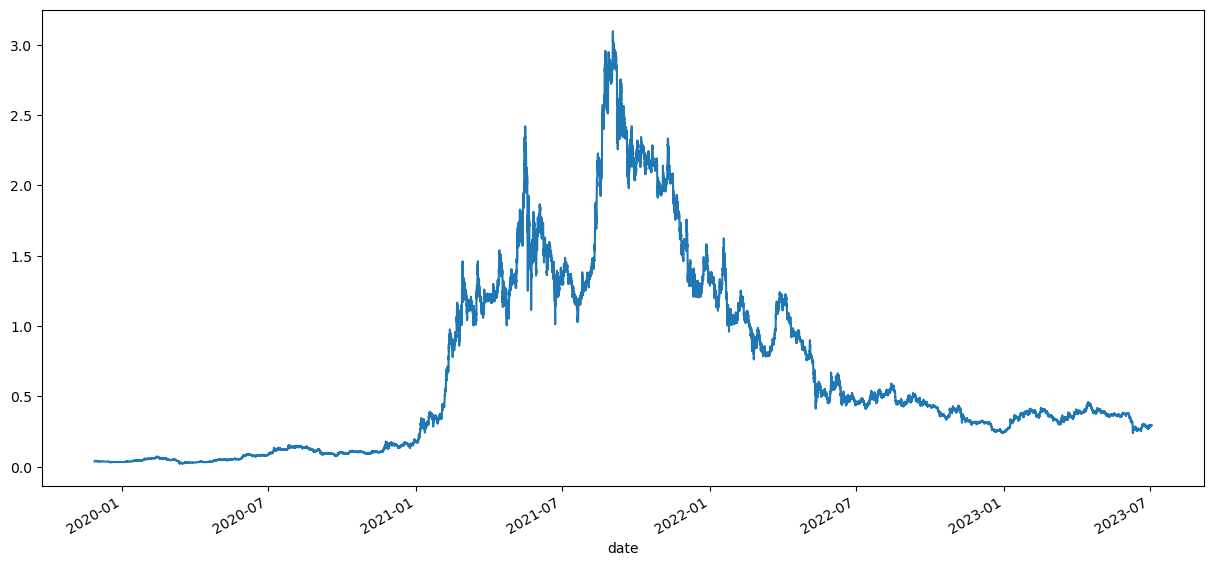

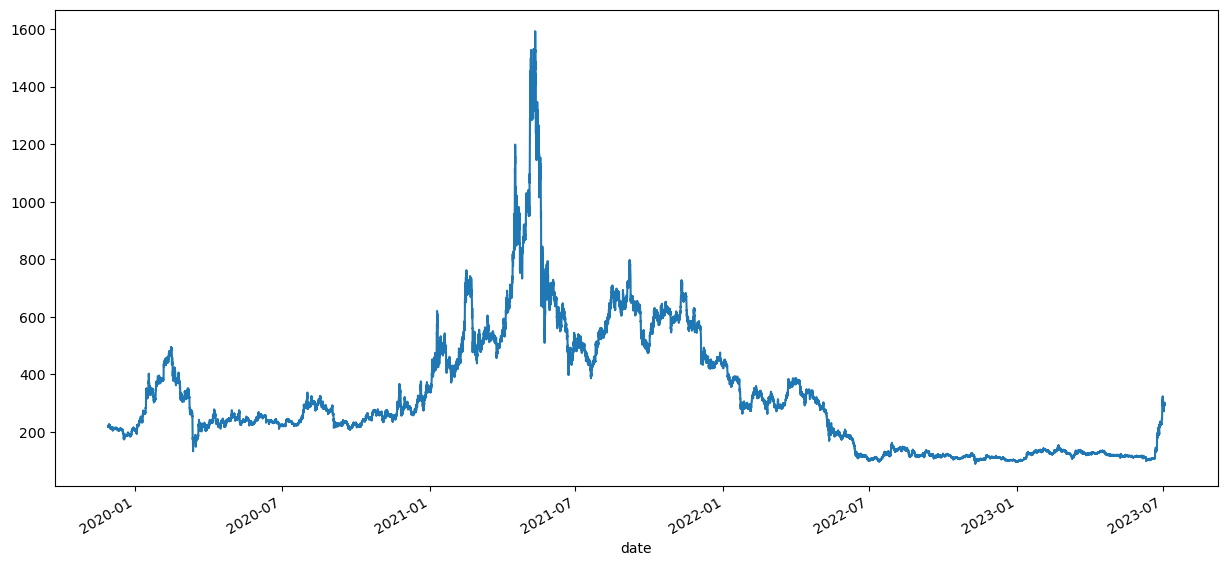

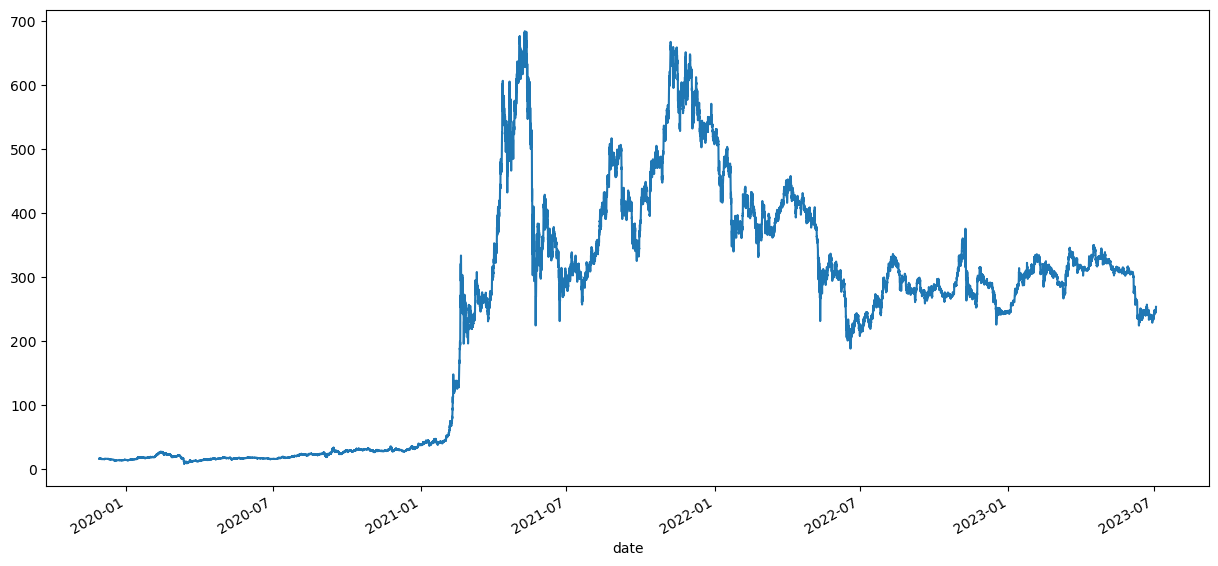

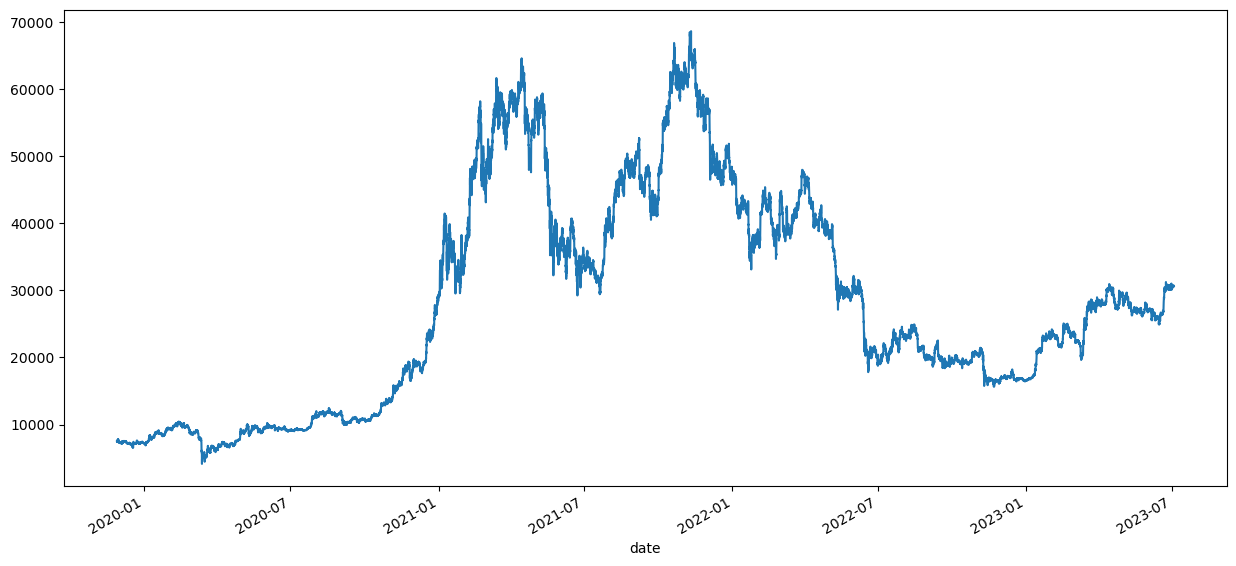

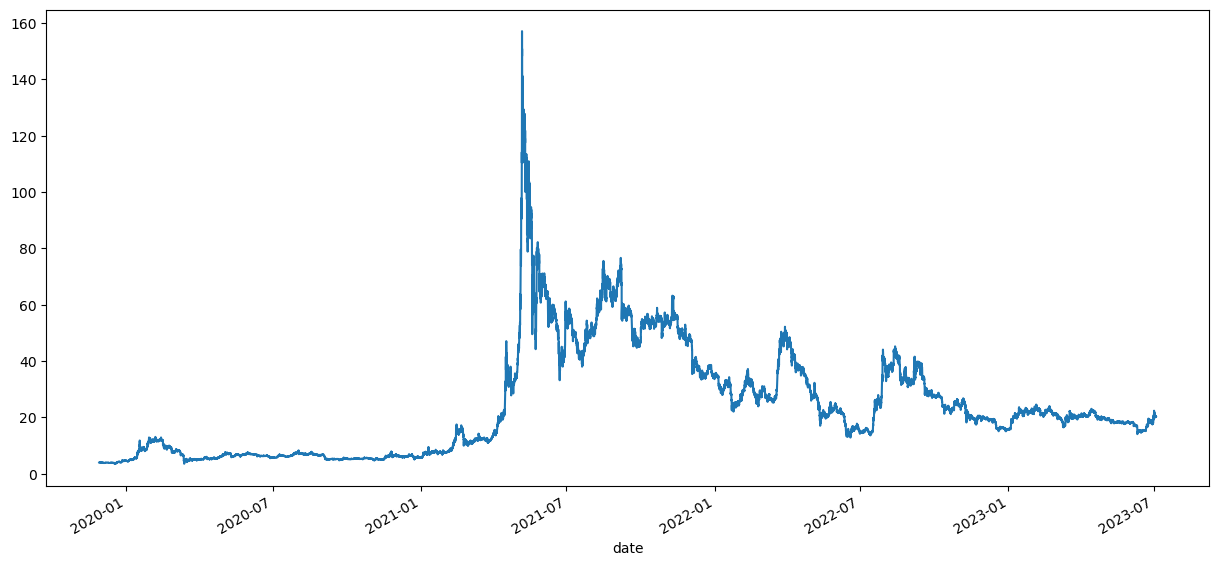

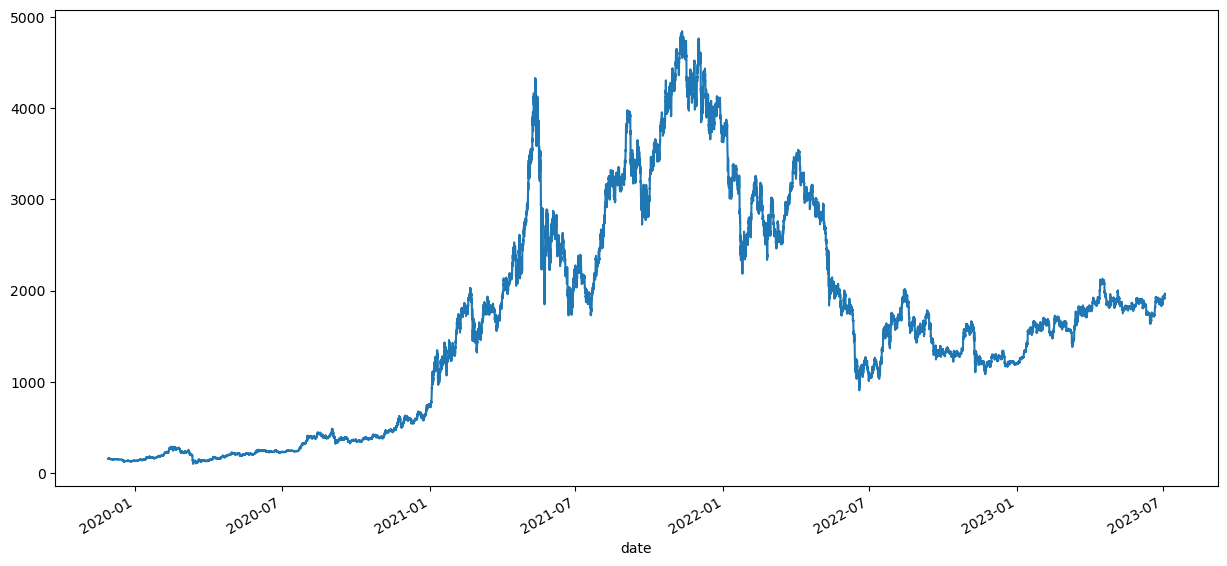

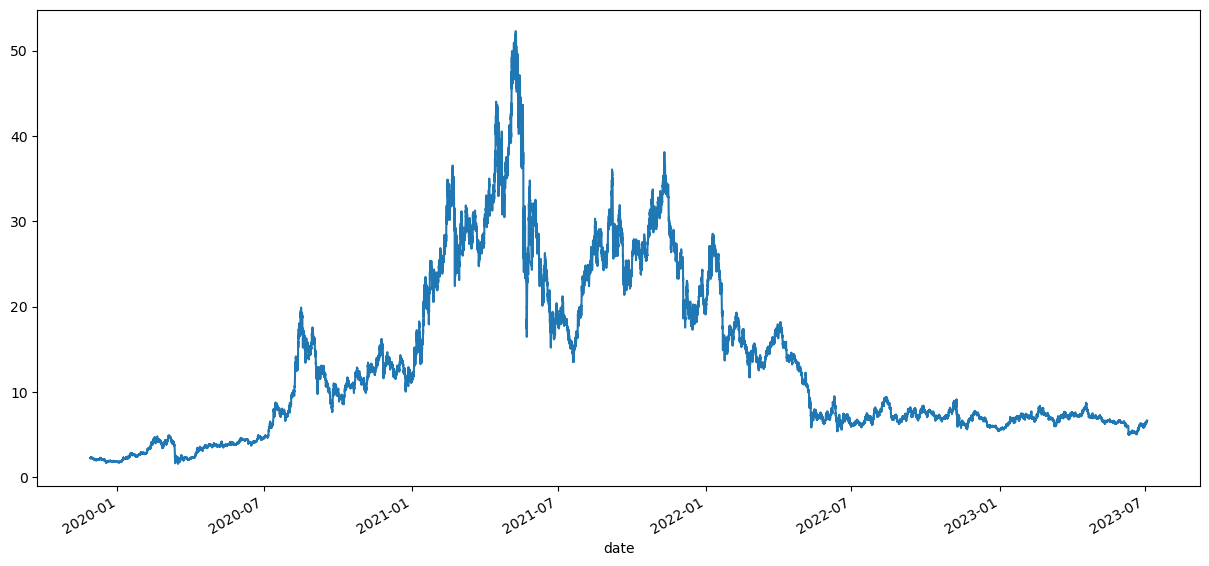

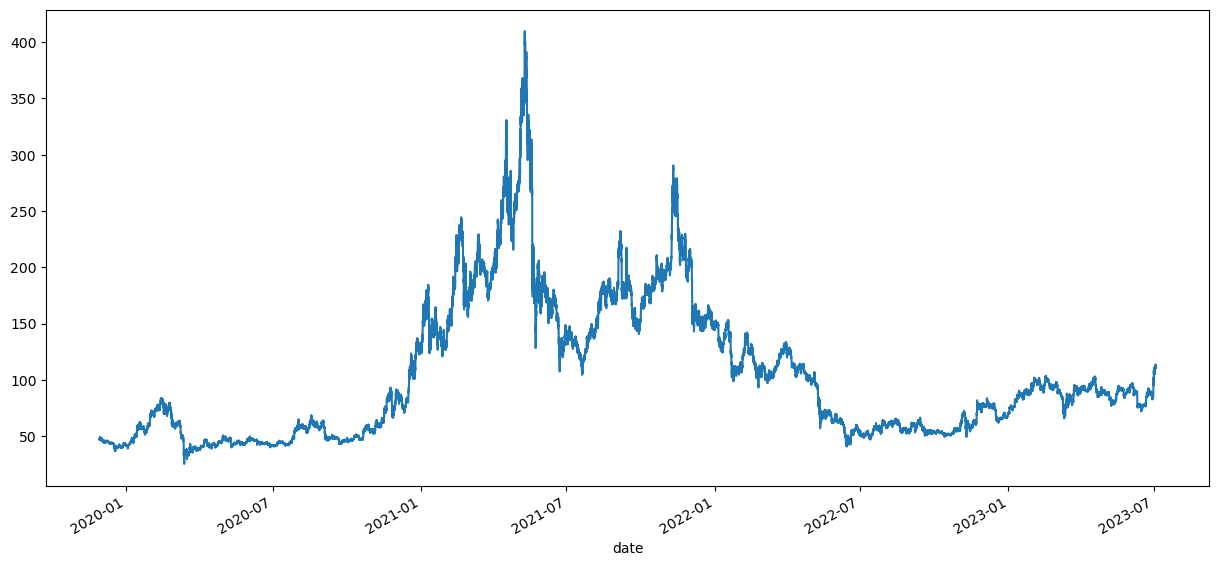

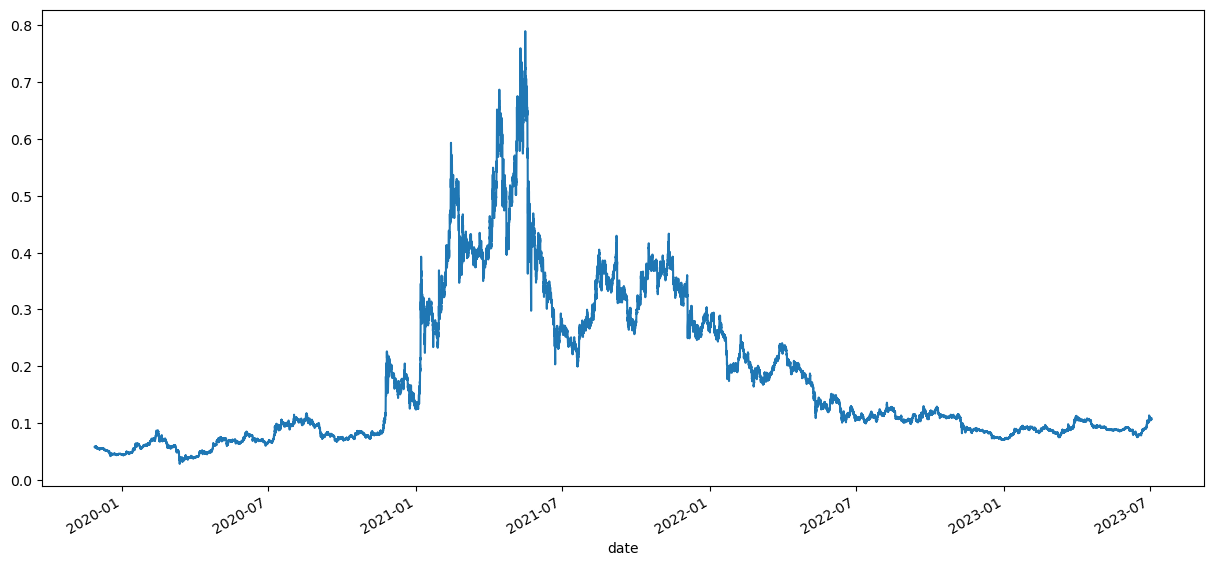

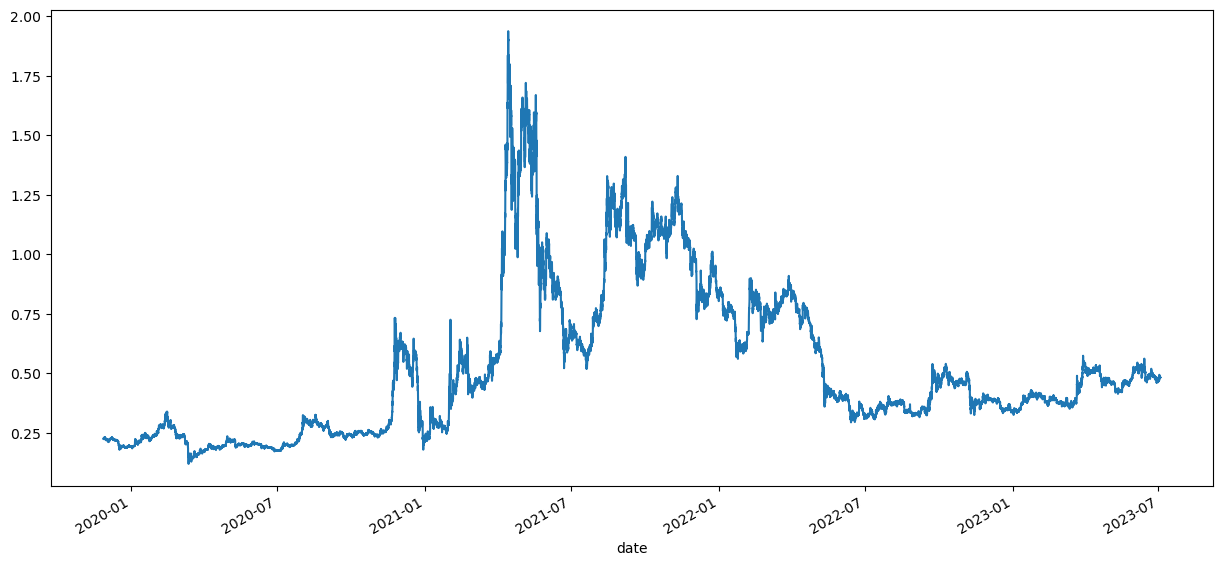

In [12]:
for cols in df_new.columns:
    fig, ax = plt.subplots(figsize = (15,7))
    df_new[cols].plot()


plt.show()

In [13]:
df_new.corr()

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
ADA,1.000000,0.723569,0.782634,0.859911,0.848417,0.869297,0.819000,0.805404,0.803867,0.887277
BCH,0.723569,1.000000,0.430161,0.690909,0.638144,0.532628,0.890495,0.889421,0.896184,0.767310
BNB,0.782634,0.430161,1.000000,0.822675,0.800248,0.939650,0.610371,0.688569,0.619362,0.834212
BTC,0.859911,0.690909,0.822675,1.000000,0.680973,0.896195,0.860330,0.897080,0.870901,0.853319
ETC,0.848417,0.638144,0.800248,0.680973,1.000000,0.820675,0.659701,0.689580,0.662189,0.833492
ETH,0.869297,0.532628,0.939650,0.896195,0.820675,1.000000,0.700819,0.746219,0.686731,0.861432
LINK,0.819000,0.890495,0.610371,0.860330,0.659701,0.700819,1.000000,0.940221,0.960905,0.836123
LTC,0.805404,0.889421,0.688569,0.897080,0.689580,0.746219,0.940221,1.000000,0.953542,0.861605
XLM,0.803867,0.896184,0.619362,0.870901,0.662189,0.686731,0.960905,0.953542,1.000000,0.833596
XRP,0.887277,0.767310,0.834212,0.853319,0.833492,0.861432,0.836123,0.861605,0.833596,1.000000


<Axes: >

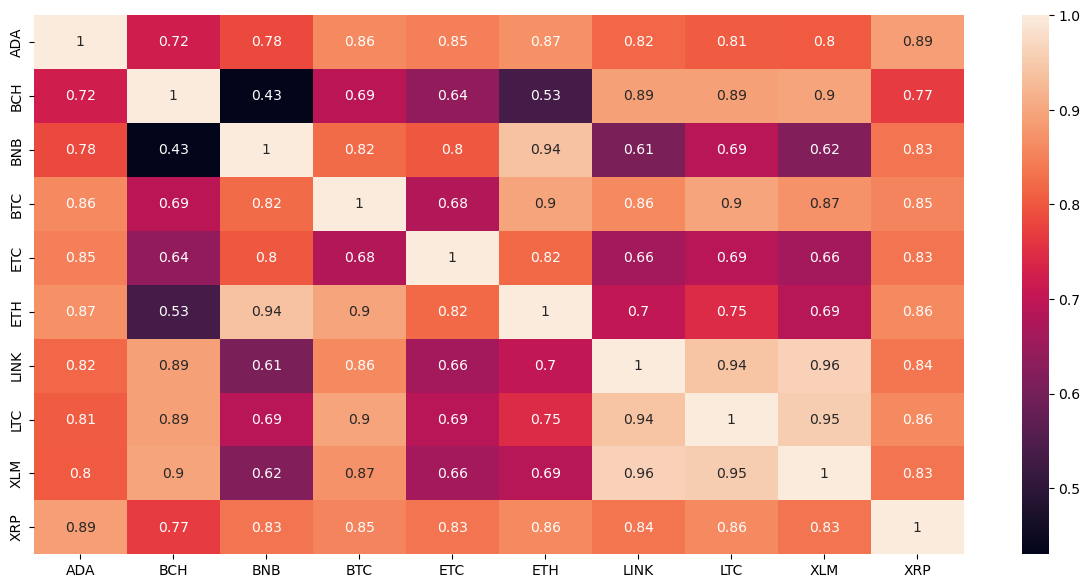

In [14]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(df_new.loc[:].corr(), annot=True)

<Axes: >

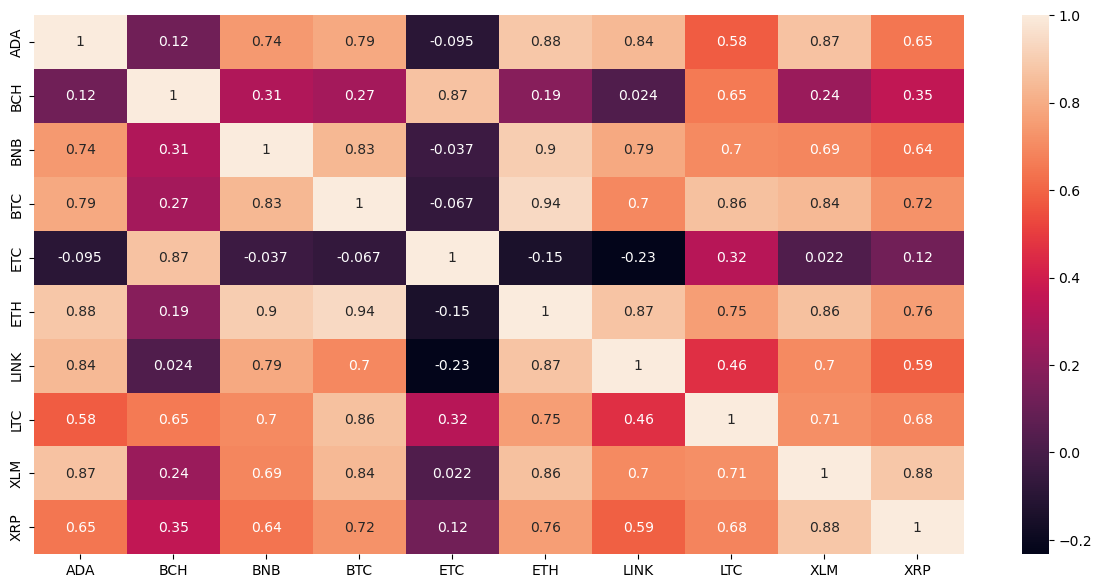

In [15]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(df_new.loc['2020'].corr(), annot=True)  #this gives me the corelation data for the year 2020!!

In [16]:
df_new_pct = df_new.pct_change()
df_new_pct

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
date,,,,,,,,,,
2019-11-28 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-28 11:00:00,0.006216,0.000274,0.000523,0.000128,0.003076,0.002911,0.007111,0.002752,0.000172,0.003151
2019-11-28 12:00:00,-0.009009,-0.006894,-0.014893,-0.004736,-0.007933,-0.005146,-0.015321,-0.010980,-0.002578,-0.004602
2019-11-28 13:00:00,-0.001039,0.003494,0.000141,0.001552,0.004675,0.001525,-0.003247,0.001494,-0.002413,-0.000667
2019-11-28 14:00:00,0.007540,0.001741,0.004150,0.000515,0.001551,-0.000861,0.010588,0.002558,0.002418,0.001423
...,...,...,...,...,...,...,...,...,...,...
2023-07-03 06:00:00,-0.003070,-0.015483,0.002027,-0.000729,-0.004440,0.001172,-0.004701,-0.004715,0.001847,0.000207
2023-07-03 07:00:00,0.006500,0.009573,0.009304,0.000520,0.007929,0.009744,0.010666,0.004112,0.007373,-0.003524
2023-07-03 08:00:00,0.002039,-0.005418,-0.003607,-0.000883,-0.009341,-0.003462,-0.002261,-0.014955,-0.018298,0.006449


<Axes: >

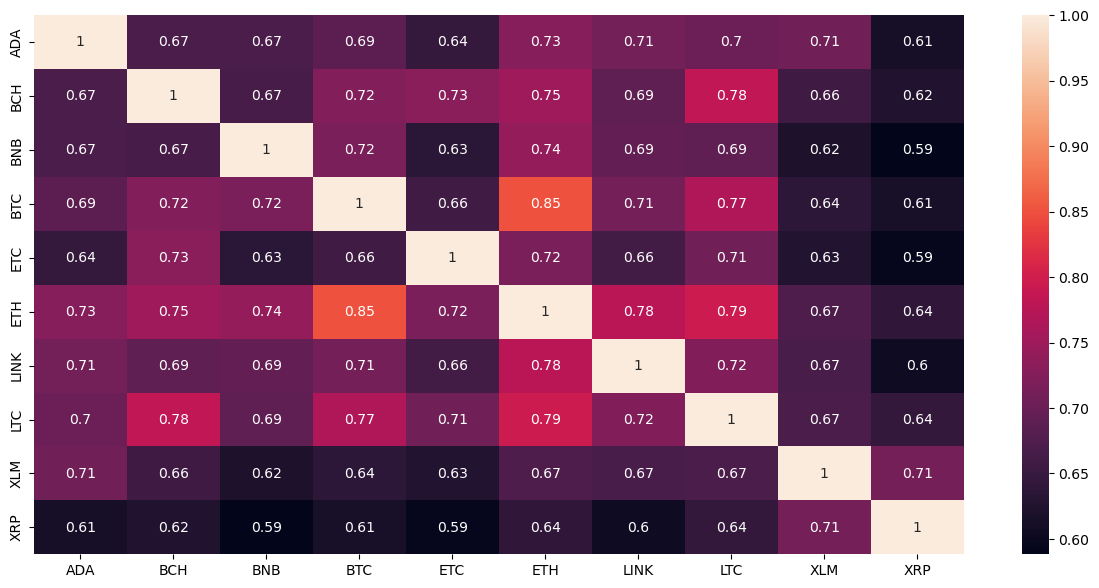

In [17]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(df_new_pct.loc[:].corr(), annot=True)

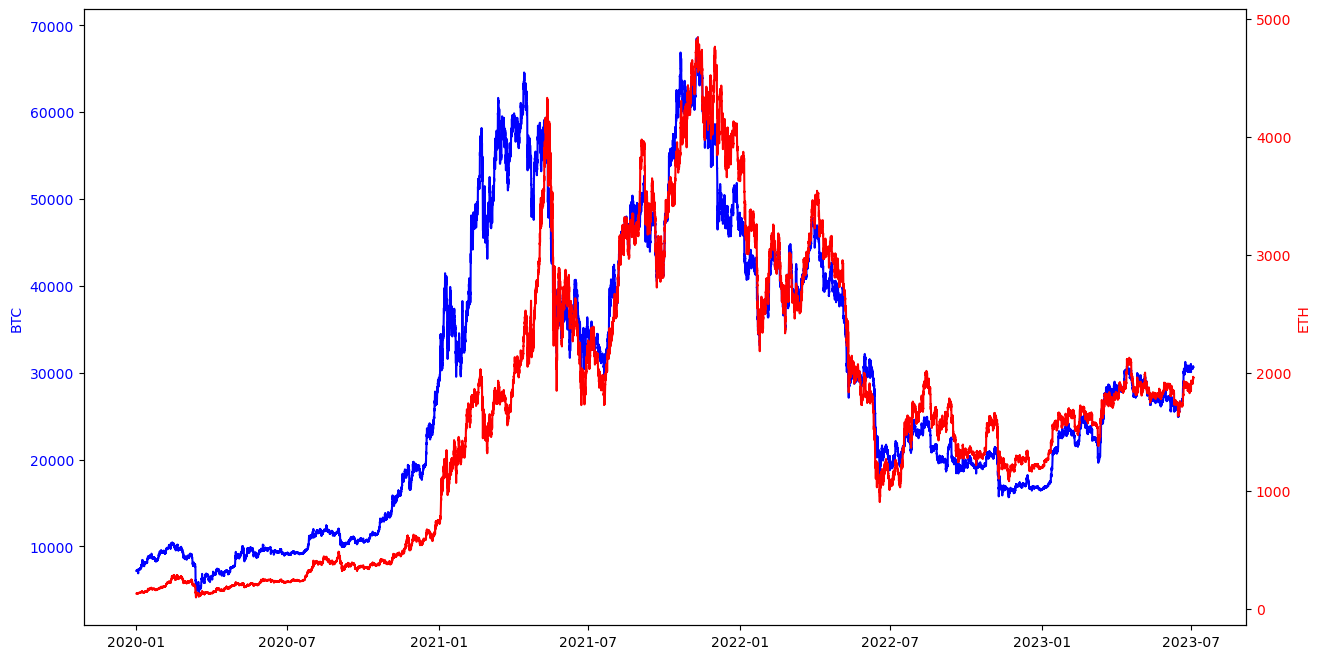

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))

data = df_new.loc["2020":'2023']
asset1 = "BTC"
asset2 = "ETH"
# Plot the first asset on the primary axis
ax.plot(data.index, data[asset1], color='blue')
ax.set_ylabel(asset1, color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Create a second axis sharing the same x-axis
ax2 = ax.twinx()

# Plot the second asset on the secondary axis
ax2.plot(data.index, data[asset2], color='red')
ax2.set_ylabel(asset2, color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

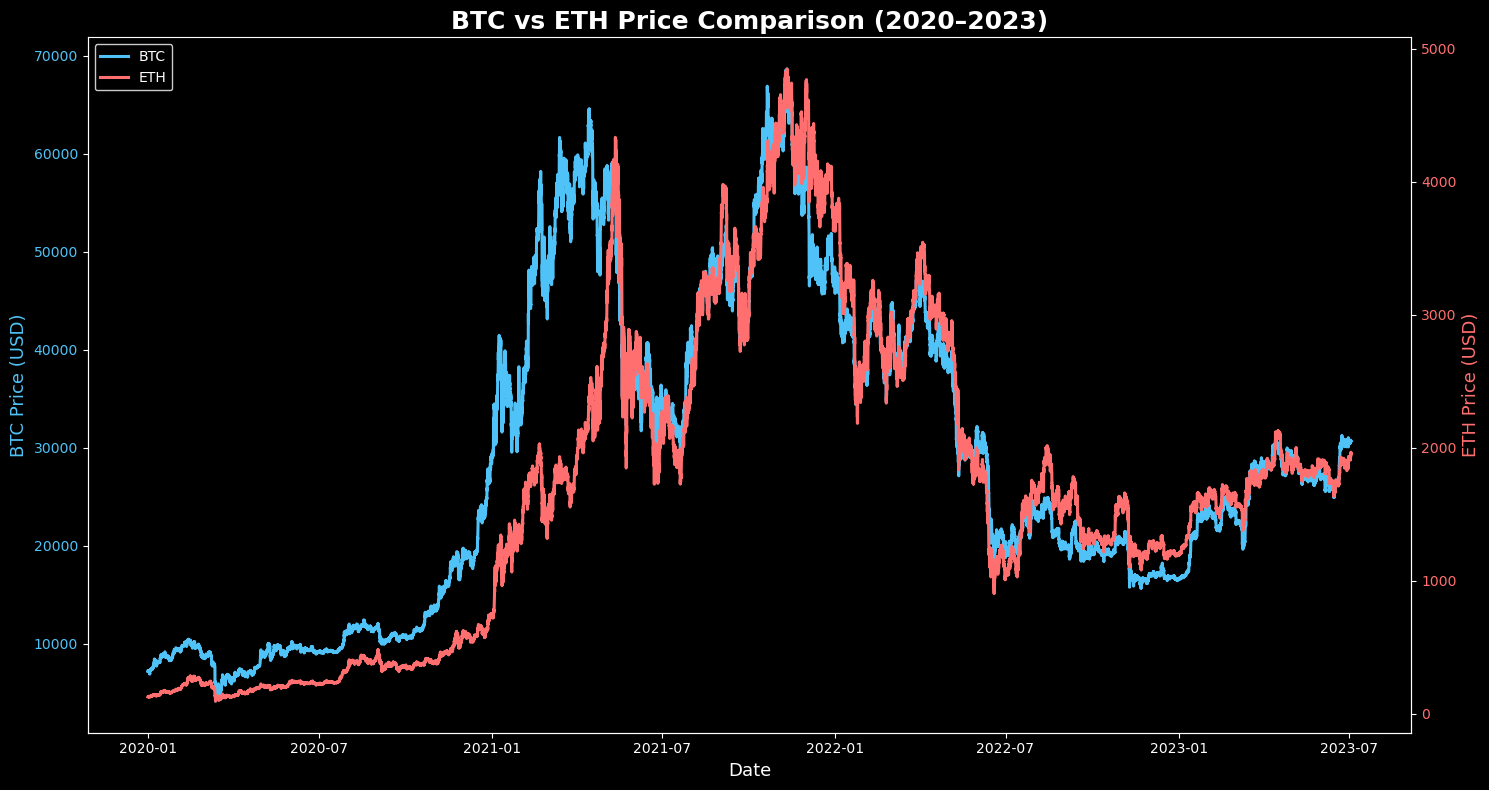

In [19]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15, 8))

data = df_new.loc["2020":"2023"]
asset1 = "BTC"
asset2 = "ETH"

# --- Primary axis (BTC) ---
ax.plot(data.index, data[asset1], linewidth=2.2, color='#4FC3F7', label=asset1)
ax.set_ylabel(f"{asset1} Price (USD)", fontsize=13, color='#4FC3F7')
ax.tick_params(axis='y', labelcolor='#4FC3F7')
ax.spines['top'].set_visible(False)

# --- Secondary axis (ETH) ---
ax2 = ax.twinx()
ax2.plot(data.index, data[asset2], linewidth=2.2, color='#FF6F6F', label=asset2)
ax2.set_ylabel(f"{asset2} Price (USD)", fontsize=13, color='#FF6F6F')
ax2.tick_params(axis='y', labelcolor='#FF6F6F')

# --- Title + labels ---
ax.set_title("BTC vs ETH Price Comparison (2020–2023)", 
                fontsize=18, weight='bold', color='white')
ax.set_xlabel("Date", fontsize=13, color='white')

# --- Grid (soft on dark) ---
ax.grid(True, linestyle='', alpha=0.2)

# --- Legend ---
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax.legend(lines_1 + lines_2, labels_1 + labels_2, 
        loc='upper left', facecolor='black', edgecolor='white')

plt.tight_layout()
plt.show()


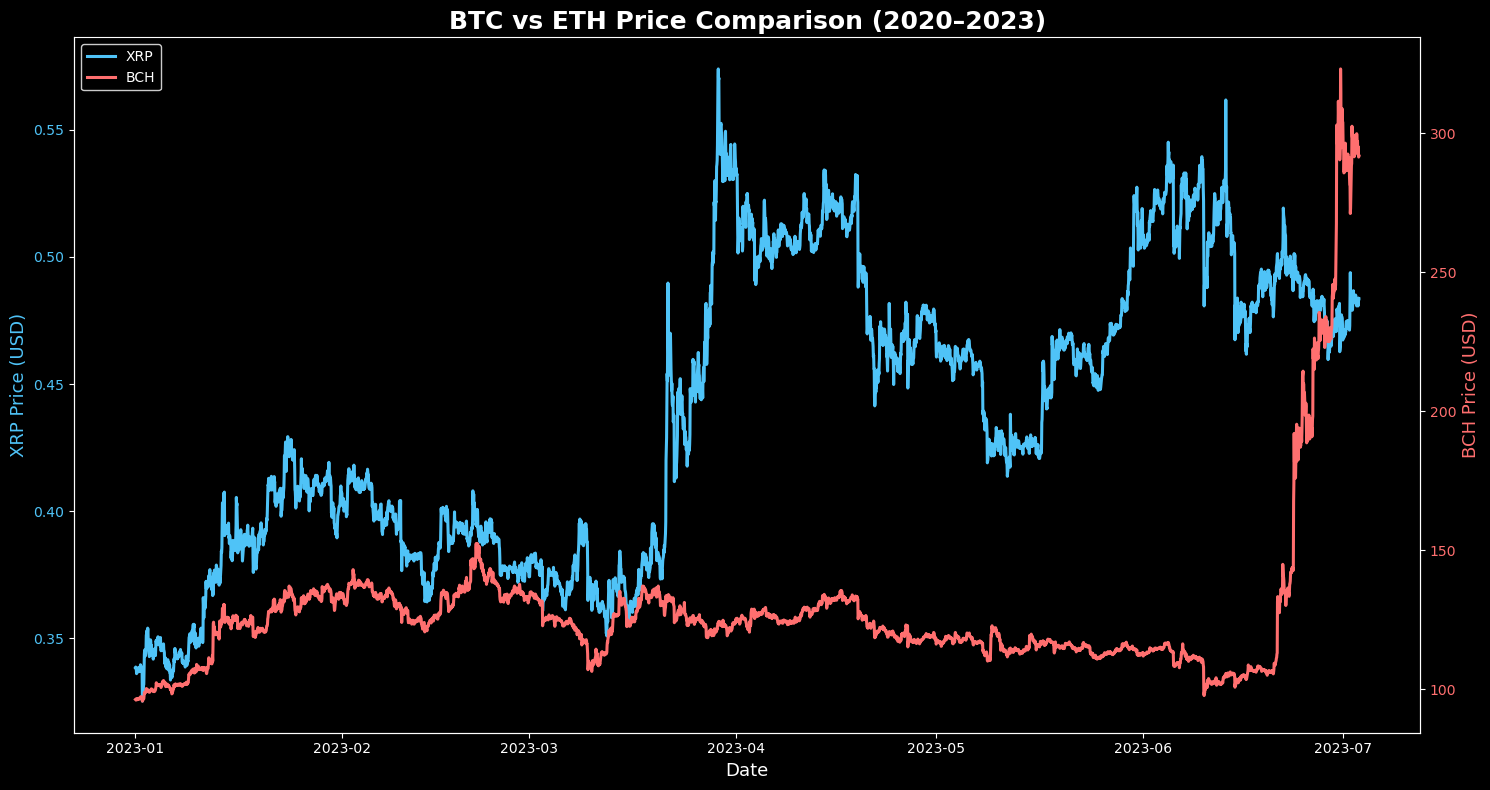

In [20]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15, 8))

data = df_new.loc["2023"]
asset1 = "XRP"
asset2 = "BCH"

# --- Primary axis (BTC) ---
ax.plot(data.index, data[asset1], linewidth=2.2, color='#4FC3F7', label=asset1)
ax.set_ylabel(f"{asset1} Price (USD)", fontsize=13, color='#4FC3F7')
ax.tick_params(axis='y', labelcolor='#4FC3F7')
ax.spines['top'].set_visible(False)

# --- Secondary axis (ETH) ---
ax2 = ax.twinx()
ax2.plot(data.index, data[asset2], linewidth=2.2, color='#FF6F6F', label=asset2)
ax2.set_ylabel(f"{asset2} Price (USD)", fontsize=13, color='#FF6F6F')
ax2.tick_params(axis='y', labelcolor='#FF6F6F')

# --- Title + labels ---
ax.set_title("BTC vs ETH Price Comparison (2020–2023)", 
                fontsize=18, weight='bold', color='white')
ax.set_xlabel("Date", fontsize=13, color='white')

# --- Grid (soft on dark) ---
ax.grid(True, linestyle='', alpha=0.2)

# --- Legend ---
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax.legend(lines_1 + lines_2, labels_1 + labels_2, 
        loc='upper left', facecolor='black', edgecolor='white')

plt.tight_layout()
plt.show()


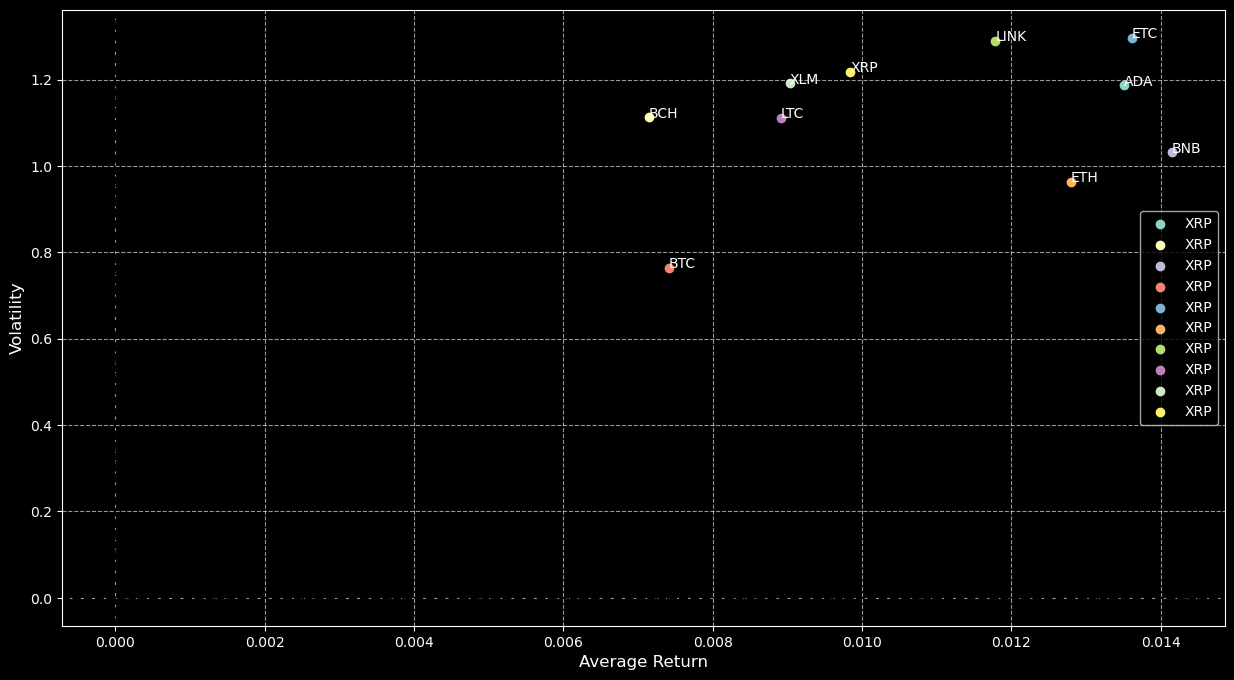

In [21]:
mean_return_list = []
volatility_list = []

temp_data = df_new_pct.loc[:]

fig, ax = plt.subplots(figsize=(15, 8))

for col in temp_data.columns:
    mean_return = temp_data[col].mean() * 100
    volatility = temp_data[col].std() * 100
    mean_return_list.append(mean_return)
    volatility_list.append(volatility)

    ax.text(mean_return, volatility, col)
    ax.scatter(mean_return, volatility, label=cols)

ax.grid(True, linestyle='--', alpha=.6)
ax.axvline(0, color='black', linestyle='--')
ax.axhline(0, color='black', linestyle='--')

ax.set_xlabel('Average Return', fontsize=12)
ax.set_ylabel('Volatility', fontsize=12)

ax.legend()

plt.show()

In [22]:
temp_data

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
date,,,,,,,,,,
2019-11-28 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-28 11:00:00,0.006216,0.000274,0.000523,0.000128,0.003076,0.002911,0.007111,0.002752,0.000172,0.003151
2019-11-28 12:00:00,-0.009009,-0.006894,-0.014893,-0.004736,-0.007933,-0.005146,-0.015321,-0.010980,-0.002578,-0.004602
2019-11-28 13:00:00,-0.001039,0.003494,0.000141,0.001552,0.004675,0.001525,-0.003247,0.001494,-0.002413,-0.000667
2019-11-28 14:00:00,0.007540,0.001741,0.004150,0.000515,0.001551,-0.000861,0.010588,0.002558,0.002418,0.001423
...,...,...,...,...,...,...,...,...,...,...
2023-07-03 06:00:00,-0.003070,-0.015483,0.002027,-0.000729,-0.004440,0.001172,-0.004701,-0.004715,0.001847,0.000207
2023-07-03 07:00:00,0.006500,0.009573,0.009304,0.000520,0.007929,0.009744,0.010666,0.004112,0.007373,-0.003524
2023-07-03 08:00:00,0.002039,-0.005418,-0.003607,-0.000883,-0.009341,-0.003462,-0.002261,-0.014955,-0.018298,0.006449


In [23]:
temp_data = df_new_pct.loc[:]

for col in temp_data.columns:
    sharpe_ratio = (8760**0.5)*(temp_data[col].mean()/temp_data[col].std())
    print(col, sharpe_ratio)

ADA 1.065207888404839
BCH 0.6007946445423711
BNB 1.2838396574552104
BTC 0.9072830623877239
ETC 0.9818470857671759
ETH 1.2437204766487708
LINK 0.8555297403398676
LTC 0.7500566212544193
XLM 0.709647250173362
XRP 0.7563949295619362


ADA 1.065207888404839
BCH 0.6007946445423711
BNB 1.2838396574552104
BTC 0.9072830623877239
ETC 0.9818470857671759
ETH 1.2437204766487708
LINK 0.8555297403398676
LTC 0.7500566212544193
XLM 0.709647250173362
XRP 0.7563949295619362


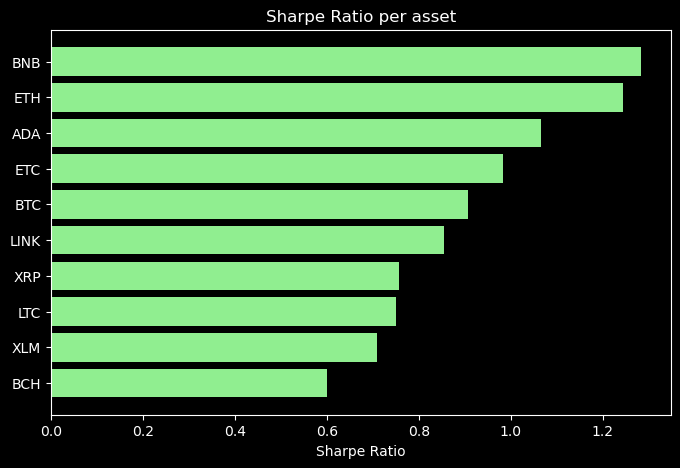

In [24]:
sharpe_ratios = []

temp_data = df_new_pct.loc[:]

for col in temp_data.columns:
    sharpe_ratio = (8760**0.5)*(temp_data[col].mean()/temp_data[col].std())
    sharpe_ratios.append(sharpe_ratio)
    print(col, sharpe_ratio)

df_sharpe = pd.DataFrame(sharpe_ratios, index=temp_data.columns, columns=['Sharpe Ratio'])
df_sharpe = df_sharpe.sort_values(by='Sharpe Ratio')

plt.figure(figsize=(8, 5))
plt.barh(df_sharpe.index, df_sharpe['Sharpe Ratio'], color='lightgreen')
plt.xlabel('Sharpe Ratio')
plt.title('Sharpe Ratio per asset')
plt.show()

In [25]:
df_new

,ADA,BCH,BNB,BTC,ETC,ETH,LINK,LTC,XLM,XRP
date,,,,,,,,,,
2019-11-28 10:00:00,0.03861,218.98,15.8646,7478.58,3.9335,151.13,2.2359,47.23,0.05817,0.22530
2019-11-28 11:00:00,0.03885,219.04,15.8729,7479.54,3.9456,151.57,2.2518,47.36,0.05818,0.22601
2019-11-28 12:00:00,0.03850,217.53,15.6365,7444.12,3.9143,150.79,2.2173,46.84,0.05803,0.22497
2019-11-28 13:00:00,0.03846,218.29,15.6387,7455.67,3.9326,151.02,2.2101,46.91,0.05789,0.22482
2019-11-28 14:00:00,0.03875,218.67,15.7036,7459.51,3.9387,150.89,2.2335,47.03,0.05803,0.22514
...,...,...,...,...,...,...,...,...,...,...
2023-07-03 06:00:00,0.29230,292.50,247.2000,30651.25,20.1800,1947.85,6.5630,111.88,0.10850,0.48240
2023-07-03 07:00:00,0.29420,295.30,249.5000,30667.19,20.3400,1966.83,6.6330,112.34,0.10930,0.48070
2023-07-03 08:00:00,0.29480,293.70,248.6000,30640.12,20.1500,1960.02,6.6180,110.66,0.10730,0.48380


In [26]:
running_max = df_new['BTC'].cummax()
max_dradown = (df_new['BTC'] - running_max)/running_max*10
max_dradown

date
2019-11-28 10:00:00    0.000000
2019-11-28 11:00:00    0.000000
2019-11-28 12:00:00   -0.047356
2019-11-28 13:00:00   -0.031914
2019-11-28 14:00:00   -0.026780
                         ...   
2023-07-03 06:00:00   -5.534081
2023-07-03 07:00:00   -5.531759
2023-07-03 08:00:00   -5.535703
2023-07-03 09:00:00   -5.540002
2023-07-03 10:00:00   -5.539239
Name: BTC, Length: 31481, dtype: float64

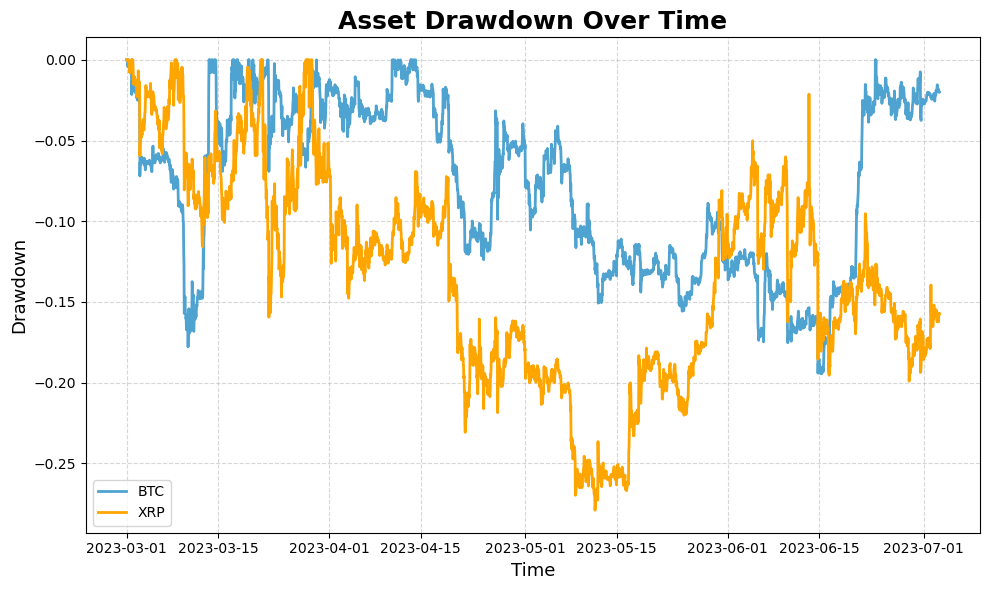

In [32]:
import matplotlib.pyplot as plt

# Use clean white theme
plt.style.use("default")

plt.figure(figsize=(10, 6))

price_data = df_new.loc['2023-03':]   # must be price data, NOT percent returns

for col, color in zip(["BTC", "XRP"], ["#4fa3d1", "orange"]):
    running_max = price_data[col].cummax()
    drawdown = (price_data[col] - running_max) / running_max
    plt.plot(drawdown, label=col, color=color, linewidth=2)

plt.title("Asset Drawdown Over Time", fontsize=18, weight="bold")
plt.xlabel("Time", fontsize=13)
plt.ylabel("Drawdown", fontsize=13)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()
